In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.drop('customerID', axis = 'columns', inplace = True)

In [4]:
df.shape

(7043, 20)

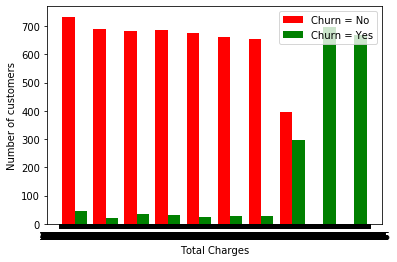

In [5]:
Total_charges_no_churn = df[df['Churn'] == 'No'].TotalCharges
Total_charges_yes_churn = df[df['Churn'] == 'Yes'].TotalCharges
plt.xlabel('Total Charges')
plt.ylabel('Number of customers')

plt.hist([Total_charges_no_churn,Total_charges_yes_churn], color = ['red','green'],  label =
        ['Churn = No', 'Churn = Yes'])
plt.legend()

In [6]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df['TotalCharges'].isna().sum()

0

In [8]:
df['MonthlyCharges'].values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [9]:
df['TotalCharges'].values


array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [10]:
pd.to_numeric(df['TotalCharges'], errors = 'coerce').isnull().shape

(7043,)

In [11]:
df1 = df[pd.to_numeric(df['TotalCharges'], errors = 'coerce').isnull()]
df1.shape

(11, 20)

In [12]:
df2 = df[df['TotalCharges'] != ' ' ]
df2.shape

(7032, 20)

In [13]:
df2['TotalCharges'] = pd.to_numeric(df2['TotalCharges'])

C:\Users\Godfred\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
df2.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [15]:
def get_column(dataframe):
    for column in df2:
            if df2[column].dtypes == 'object':
                print(f'{column}: {df2[column].unique()}')
    

In [16]:
get_column(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [17]:
df2.replace('No phone service', 'No', inplace = True)
df2.replace('No internet service', 'No', inplace = True)

C:\Users\Godfred\Anaconda3\lib\site-packages\pandas\core\frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


In [18]:
get_column(df2)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [19]:
binary_column = ['Partner', 'Dependents', 'PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for i in binary_column:
    df2[i].replace({'Yes': 1, 'No': 0}, inplace = True)
  

C:\Users\Godfred\Anaconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [20]:
df2.replace({'Female': 0, 'Male': 1}, inplace = True)

In [21]:
get_column(df2)

InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [22]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [23]:
df3 = pd.get_dummies(data = df2)

In [24]:
columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
df3[columns] = scale.fit_transform(df3[columns])

In [25]:
for i in columns:
    print(f'{i}:{df3[i].unique()}')


tenure:[0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
MonthlyCharges:[0.11542289 0.38507463 0.35422886 ... 0.44626866 0.25820896 0.60149254]
TotalCharges:[0.0012751  0.21586661 0.01031041 ... 0.03780868 0.03321025 0.78764136]


In [26]:
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [27]:
df3.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                     float64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [28]:
X = df3.drop('Churn', axis = 'columns')
y = df3['Churn']

In [29]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [30]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state = 42)

In [32]:
y_test.shape

(2813,)

In [33]:
import tensorflow as tf
from tensorflow import keras 


In [45]:
model = keras.Sequential([
    
    keras.layers.Dense(100, input_dim = 26, activation = 'relu'),
    keras.layers.Dense(200,  activation = 'relu'),
    keras.layers.Dense(200,  activation = 'relu'),
     keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train, y_train, epochs  = 50)

Epoch 1/50
4219/4219 [==============================] - 1s 273us/sample - loss: 0.4519 - acc: 0.7751
Epoch 2/50
4219/4219 [==============================] - 0s 110us/sample - loss: 0.4210 - acc: 0.7973
Epoch 3/50
4219/4219 [==============================] - 0s 116us/sample - loss: 0.4159 - acc: 0.8007
Epoch 4/50
4219/4219 [==============================] - 0s 113us/sample - loss: 0.4079 - acc: 0.8066
Epoch 5/50
4219/4219 [==============================] - 0s 106us/sample - loss: 0.3996 - acc: 0.8078
Epoch 6/50
4219/4219 [==============================] - 0s 106us/sample - loss: 0.3951 - acc: 0.8087
Epoch 7/50
4219/4219 [==============================] - 0s 108us/sample - loss: 0.3879 - acc: 0.8128
Epoch 8/50
4219/4219 [==============================] - 0s 107us/sample - loss: 0.3783 - acc: 0.8187
Epoch 9/50
4219/4219 [==============================] - 0s 115us/sample - loss: 0.3686 - acc: 0.8218
Epoch 10/50
4219/4219 [==============================] - 0s 106us/sample - loss: 0.3635 - a

In [46]:
y_pred = model.predict(X_test)

In [ ]:
#y_pred = (np.float64(y_pred),5)

In [58]:
y_pred[:10]
y_preeds = np.round(y_pred)
y_preeds[:10]

array([[0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)

In [48]:
y_test[:10]

2481    0
6784    0
6125    1
3052    0
4099    0
3223    0
3774    0
3469    0
3420    0
1196    0
Name: Churn, dtype: int64

In [49]:
y_predicted = []
for i in y_pred:
    if i > 0.5:
        y_predicted.append(1)
    else:
        y_predicted.append(0)

In [50]:
y_predicted[:10]

[0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

In [51]:
y_test[:10]

2481    0
6784    0
6125    1
3052    0
4099    0
3223    0
3774    0
3469    0
3420    0
1196    0
Name: Churn, dtype: int64

In [52]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test,y_predicted)

Text(33.0, 0.5, 'Truth')

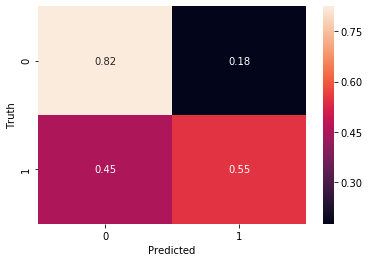

In [53]:
cm = cm.astype('float')/cm.sum(axis = 1)[:,np.newaxis]
import seaborn as sn 
sn.heatmap(cm, annot = True, fmt = '.2f')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [59]:
from sklearn.metrics import classification_report, confusion_matrix
cr = classification_report(y_test, y_predicted)

In [55]:
print('classification report\n', cr)

classification report
               precision    recall  f1-score   support

           0       0.84      0.82      0.83      2079
           1       0.52      0.55      0.53       734

    accuracy                           0.75      2813
   macro avg       0.68      0.69      0.68      2813
weighted avg       0.76      0.75      0.75      2813



In [56]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 100)               2700      
_________________________________________________________________
dense_17 (Dense)             (None, 200)               20200     
_________________________________________________________________
dense_18 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 201       
Total params: 63,301
Trainable params: 63,301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
!pip install h5py pyyaml

# how to save a neural network model, study later!!


In [ ]:
#import os.path 
#if os.path.isfile('ml/customer_churn') is False:
    #model.save('ml/customer_churn.h5')


In [62]:
def ANN(X_train, X_test, y_train, y_test, loss):
    
    model = keras.Sequential([
                    keras.layers.Dense(100, input_dim = 26, activation = 'relu'),
                    keras.layers.Dense(200,  activation = 'relu'),
                    keras.layers.Dense(200,  activation = 'relu'),
                    keras.layers.Dense(1, activation = 'sigmoid')
    ])

    model.compile(
            optimizer = 'adam',
            loss = loss,
            metrics = ['accuracy']
        )
    model.fit(X_train, y_train, epochs  = 50)
    
    y_pred = model.predict(X_test)
    y_pred = np.round(y_pred)
    
    
    cr = classification_report(y_test, y_pred)
    
    print('Classification Report\n', cr)
    
    cm =  confusion_matrix(y_test, y_pred)
    cm = cm.astype('float')/cm.sum(axis = 1)[:,np.newaxis]
    import seaborn as sn
    sn.heatmap(cm, annot = True, fmt = '.2f')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    

# UnderSampling 

In [64]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [65]:
count_0, count_1 = y.value_counts()

In [66]:
count_0, count_1

(5163, 1869)

In [77]:
df_count_0 = df3[df3['Churn'] == 0]
df_count_1 = df3[df3['Churn'] == 1]

In [78]:
df_count_0_under = df_count_0.sample(count_1)
df_count_0_under.shape

(1869, 27)

In [79]:
df_under = pd.concat([df_count_0_under, df_count_1], axis = 0)

In [81]:
df_under.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4596,1,0,0,0,0.239437,1,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0
2964,1,0,1,0,0.323944,1,1,1,0,0,...,1,0,0,0,1,0,0,0,1,0
1060,1,0,1,1,0.352113,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
848,1,0,1,0,1.000000,1,1,1,1,1,...,1,0,0,0,0,1,0,1,0,0
1630,1,1,1,0,0.521127,1,1,0,1,1,...,0,1,0,1,0,0,0,0,1,0


In [85]:
X = df_under.drop('Churn', axis = 1)
y = df_under['Churn']


In [92]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state = 42, stratify = y)

In [93]:
y_train.value_counts()

1    1121
0    1121
Name: Churn, dtype: int64

Epoch 1/50
2242/2242 [==============================] - 1s 346us/sample - loss: 0.5453 - acc: 0.7279
Epoch 2/50
2242/2242 [==============================] - 0s 84us/sample - loss: 0.4903 - acc: 0.7565
Epoch 3/50
2242/2242 [==============================] - 0s 93us/sample - loss: 0.4698 - acc: 0.7654
Epoch 4/50
2242/2242 [==============================] - 0s 83us/sample - loss: 0.4636 - acc: 0.7703
Epoch 5/50
2242/2242 [==============================] - 0s 86us/sample - loss: 0.4584 - acc: 0.7707
Epoch 6/50
2242/2242 [==============================] - 0s 82us/sample - loss: 0.4478 - acc: 0.7779
Epoch 7/50
2242/2242 [==============================] - 0s 85us/sample - loss: 0.4446 - acc: 0.7868
Epoch 8/50
2242/2242 [==============================] - 0s 95us/sample - loss: 0.4234 - acc: 0.7939
Epoch 9/50
2242/2242 [==============================] - 0s 84us/sample - loss: 0.4131 - acc: 0.8006
Epoch 10/50
2242/2242 [==============================] - 0s 85us/sample - loss: 0.4017 - acc: 0.809

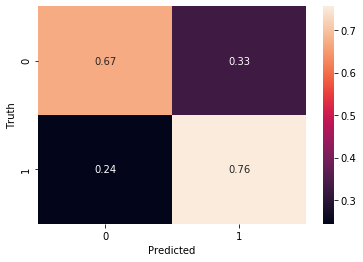

In [94]:
ANN(X_train, X_test, y_train, y_test, 'binary_crossentropy')

# Oversampling 

In [96]:
df_count_0 = df3[df3['Churn'] == 0]
df_count_1 = df3[df3['Churn'] == 1]
print(df_count_0.shape)
print(df_count_1.shape)

(5163, 27)
(1869, 27)


In [98]:
df_count_1_over = df_count_0.sample(count_0)
df_count_1_over.shape

(5163, 27)

In [100]:
df_over = pd.concat([df_count_0, df_count_1_over], axis = 0)
df_over.shape

(10326, 27)

In [101]:
X = df_over.drop('Churn', axis = 1)
y = df_over['Churn']

In [102]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state = 42, stratify = y)

Epoch 1/50
6195/6195 [==============================] - 1s 188us/sample - loss: 0.0198 - acc: 0.9939
Epoch 2/50
6195/6195 [==============================] - 1s 83us/sample - loss: 4.2196e-06 - acc: 1.0000
Epoch 3/50
6195/6195 [==============================] - 1s 83us/sample - loss: 1.3981e-06 - acc: 1.0000
Epoch 4/50
6195/6195 [==============================] - 1s 85us/sample - loss: 4.3284e-07 - acc: 1.0000
Epoch 5/50
6195/6195 [==============================] - 1s 84us/sample - loss: 2.0879e-07 - acc: 1.0000
Epoch 6/50
6195/6195 [==============================] - 1s 83us/sample - loss: 1.2368e-07 - acc: 1.0000
Epoch 7/50
6195/6195 [==============================] - 1s 85us/sample - loss: 8.0357e-08 - acc: 1.0000
Epoch 8/50
6195/6195 [==============================] - 0s 80us/sample - loss: 5.7152e-08 - acc: 1.0000
Epoch 9/50
6195/6195 [==============================] - 1s 86us/sample - loss: 4.2542e-08 - acc: 1.0000
Epoch 10/50
6195/6195 [==============================] - 1s 81us/sa

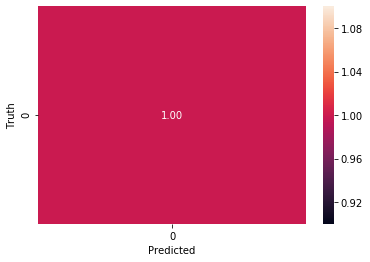

In [103]:
ANN(X_train, X_test, y_train, y_test, 'binary_crossentropy')

#  SMOTE 

In [108]:
from imblearn.over_sampling  import SMOTE

In [110]:
X = df3.drop('Churn', axis = 'columns')
y = df3['Churn']
print(y.shape)
print(X.shape)

(7032,)
(7032, 26)


In [113]:
sm = SMOTE(random_state = 42)
X_sm, y_sm = sm.fit_resample(X,y)

In [114]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm, test_size = 0.4, random_state = 42, stratify = y_sm)

Epoch 1/50
6195/6195 [==============================] - 1s 184us/sample - loss: 0.4854 - acc: 0.7730
Epoch 2/50
6195/6195 [==============================] - 1s 85us/sample - loss: 0.4518 - acc: 0.7863
Epoch 3/50
6195/6195 [==============================] - 1s 82us/sample - loss: 0.4403 - acc: 0.7984
Epoch 4/50
6195/6195 [==============================] - 1s 87us/sample - loss: 0.4249 - acc: 0.8061
Epoch 5/50
6195/6195 [==============================] - 1s 83us/sample - loss: 0.4149 - acc: 0.8128
Epoch 6/50
6195/6195 [==============================] - 1s 84us/sample - loss: 0.3994 - acc: 0.8211
Epoch 7/50
6195/6195 [==============================] - 1s 81us/sample - loss: 0.3850 - acc: 0.8316
Epoch 8/50
6195/6195 [==============================] - 1s 87us/sample - loss: 0.3749 - acc: 0.8363
Epoch 9/50
6195/6195 [==============================] - 1s 86us/sample - loss: 0.3621 - acc: 0.8399
Epoch 10/50
6195/6195 [==============================] - 0s 80us/sample - loss: 0.3524 - acc: 0.846

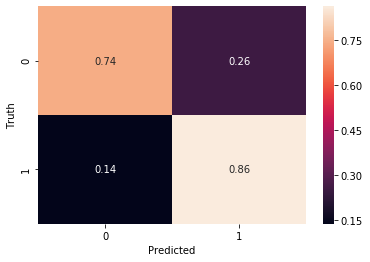

In [115]:
ANN(X_train, X_test, y_train, y_test, 'binary_crossentropy')